In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Conv2D, InputLayer,Dense,MaxPool2D, Flatten, BatchNormalization,Input
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives
metrics=[BinaryAccuracy(name="accuracy"),Precision(name="precision"),Recall(name="recall"),TruePositives(name="TP"),
         TrueNegatives(name="TN"),FalsePositives(name="FP"),FalseNegatives(name="FN"),]

In [ ]:
dataset,dataset_info=tfds.load('malaria', with_info=True,as_supervised=True, shuffle_files=True,split=['train'])

(<tf.Tensor: shape=(145, 148, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)


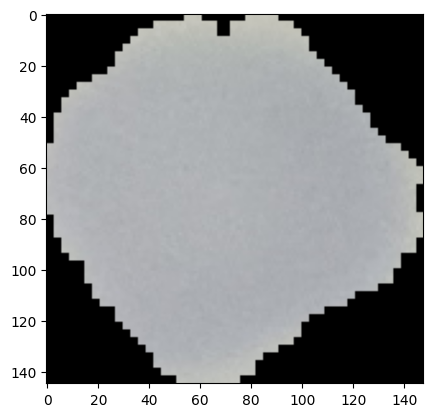

(<tf.Tensor: shape=(133, 127, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)


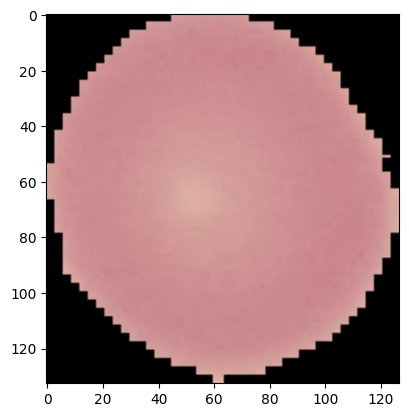

(<tf.Tensor: shape=(118, 118, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


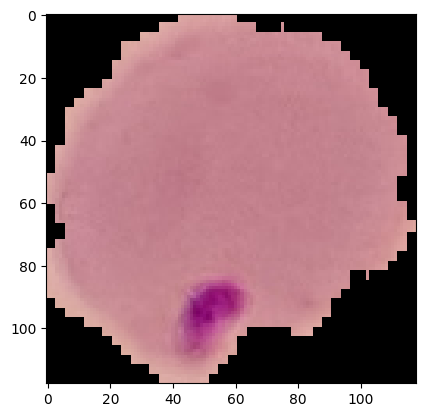

(<tf.Tensor: shape=(124, 121, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)


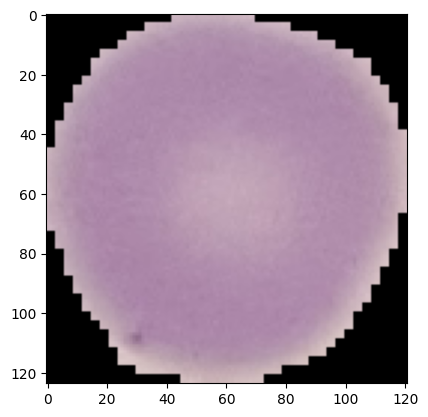

(<tf.Tensor: shape=(151, 148, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


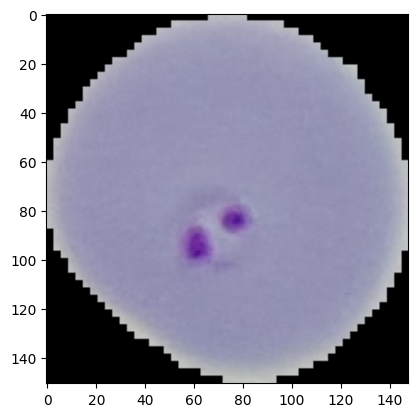

(<tf.Tensor: shape=(151, 130, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


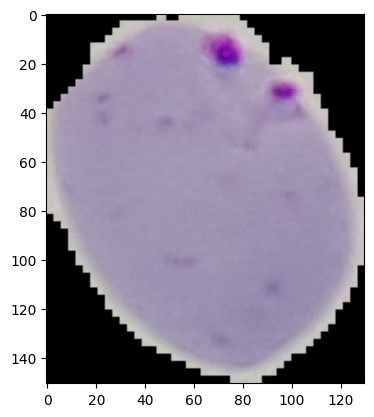

In [ ]:
for data in dataset[0].take(6):
  print(data)
  image_tensor, label = data
  image_array = image_tensor.numpy()
  plt.imshow(image_array)  # Display the image
  #plt.title(f'Label: {label.numpy()}')  # Display the label
  #plt.axis('off')  # Hide axis
  plt.show()  # Show the plot

**Splitting Data Into Train Test**

In [ ]:

def splits(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
  DATASET_SIZE = len(dataset)

  train_dataset = dataset.take(int(TRAIN_RATIO*DATASET_SIZE))

  val_test_dataset = dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))
  val_dataset = val_test_dataset.take(int(VAL_RATIO*DATASET_SIZE))

  test_dataset = val_test_dataset.skip(int(VAL_RATIO*DATASET_SIZE))
  return train_dataset, val_dataset, test_dataset

In [ ]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
train_dataset,val_dataset,test_dataset=splits(dataset[0],TRAIN_RATIO ,VAL_RATIO ,TEST_RATIO )

print(list(train_dataset.take(1).as_numpy_iterator()))
print(list(val_dataset.take(1).as_numpy_iterator()))
print(list(test_dataset.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 0)]
[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

**Data Visualization**

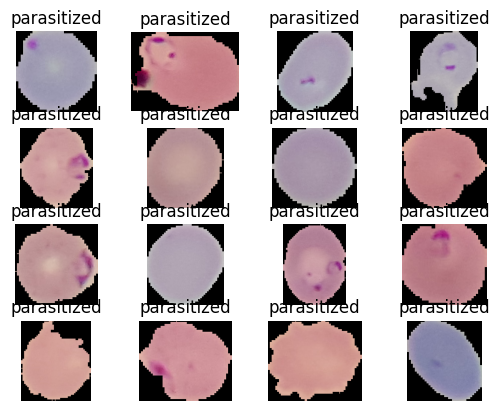

In [ ]:
for i, (imge, lable) in enumerate(train_dataset.take(16)):
  ax=plt.subplot(4,4,i + 1)
  plt.imshow(imge)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis('off')


**Data Preprocessing**

In [ ]:
im_size=224
def resizing_and_scaling(image,label):
  return tf.image.resize(image,(im_size,im_size))/255.0, label# it will resize the data and deviding by 255 are the scaling of data


In [ ]:
train_dataset=train_dataset.map(resizing_and_scaling)
val_dataset=val_dataset.map(resizing_and_scaling)
test_dataset=test_dataset.map(resizing_and_scaling)

In [ ]:
for imgg,label in train_dataset.take(1):
  print(imgg,label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


##Model Creation

In [ ]:
batch_size=32
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration=True ).batch(batch_size).prefetch( tf.data.AUTOTUNE)


In [ ]:
batch_size=32
val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration=True ).batch(batch_size).prefetch( tf.data.AUTOTUNE)


In [ ]:
batch_size=32
test_dataset = test_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration=True ).batch(batch_size).prefetch( tf.data.AUTOTUNE)


In [ ]:
model=tf.keras.Sequential([
    InputLayer(input_shape = (im_size,im_size,3)),

    Conv2D(filters=6, kernel_size= 5, strides= 1, padding='valid', activation = 'sigmoid'),
    MaxPool2D(pool_size= 2, strides=2),

    Conv2D(filters=16, kernel_size= 5, strides= 1, padding='valid', activation = 'sigmoid'),
    MaxPool2D(pool_size= 2, strides=2),

    Flatten(),

    Dense(100, activation = 'sigmoid'),
    Dense(10, activation = 'sigmoid'),
    Dense(1, activation = 'sigmoid'),


])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 220, 220, 6)         │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 110, 110, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 106, 106, 16)        │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 53, 53, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 44944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │       4,494,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,498,393 (17.16 MB)

 Trainable params: 4,498,393 (17.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=Adam(0.001),
              loss=BinaryCrossentropy())

In [ ]:
history= model.fit(train_dataset, validation_data= val_dataset, epochs=10, verbose=1)

Epoch 1/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 59s 79ms/step - loss: 0.7030 - val_loss: 0.6934
Epoch 2/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 74s 71ms/step - loss: 0.6941 - val_loss: 0.6939
Epoch 3/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 46s 67ms/step - loss: 0.6941 - val_loss: 0.6943
Epoch 4/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 79s 63ms/step - loss: 0.6939 - val_loss: 0.6942
Epoch 5/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 83s 64ms/step - loss: 0.6938 - val_loss: 0.6951
Epoch 6/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 88s 74ms/step - loss: 0.6938 - val_loss: 0.6951
Epoch 7/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 49s 71ms/step - loss: 0.6938 - val_loss: 0.6947
Epoch 8/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 76s 63ms/step - loss: 0.6937 - val_loss: 0.6946
Epoch 9/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 44s 63ms/step - loss: 0.6937 - val_loss: 0.6945
Epoch 10/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 45s 66ms/step - loss: 0.6937 - val_loss: 0.6946


**BY Using RELU is the activation function**

it give same loss like using SIGMOID .SO we will use BATCHNormalization to make it's performance good

In [ ]:
model=tf.keras.Sequential([
    InputLayer(input_shape = (im_size,im_size,3)),

    Conv2D(filters=6, kernel_size= 3, strides= 1, padding='valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size= 2, strides=2),

    Conv2D(filters=16, kernel_size= 3, strides= 1, padding='valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size= 2, strides=2),

    Flatten(),

    Dense(100, activation = 'relu'),
    BatchNormalization(),

    Dense(10, activation = 'relu'),
    BatchNormalization(),

    Dense(1, activation = 'sigmoid'),


])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 6)         │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 222, 222, 6)         │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 111, 111, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 109, 109, 16)        │             880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 109, 109, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 54, 54, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 46656)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 100)                 │       4,665,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,668,297 (17.81 MB)

 Trainable params: 4,668,033 (17.81 MB)

 Non-trainable params: 264 (1.03 KB)

In [ ]:
model.compile(optimizer=Adam(0.001),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history= model.fit(train_dataset, validation_data= val_dataset, epochs=15, verbose=1)

Epoch 1/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 55s 73ms/step - accuracy: 0.7991 - loss: 0.4467 - val_accuracy: 0.8465 - val_loss: 0.5751
Epoch 2/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 85s 80ms/step - accuracy: 0.9285 - loss: 0.1996 - val_accuracy: 0.9212 - val_loss: 0.2323
Epoch 3/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 73s 67ms/step - accuracy: 0.9363 - loss: 0.1812 - val_accuracy: 0.9416 - val_loss: 0.1723
Epoch 4/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 48s 69ms/step - accuracy: 0.9445 - loss: 0.1617 - val_accuracy: 0.9441 - val_loss: 0.1724
Epoch 5/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 85s 74ms/step - accuracy: 0.9463 - loss: 0.1490 - val_accuracy: 0.9260 - val_loss: 0.2168
Epoch 6/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 44s 64ms/step - accuracy: 0.9479 - loss: 0.1435 - val_accuracy: 0.9423 - val_loss: 0.1764
Epoch 7/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 88s 73ms/step - accuracy: 0.9597 - loss: 0.1140 - val_accuracy: 0.9256 - val_loss: 0.2444
Epoch 8/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 47s 69ms/step - accuracy: 0.9667 - loss: 0.0902 - 

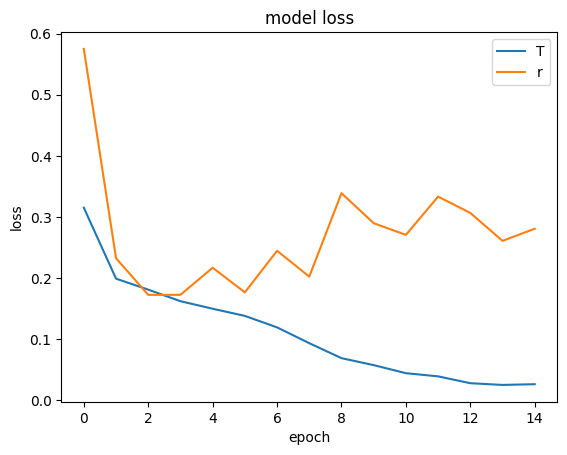

In [ ]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend('Train loss, Val Loss')
plt.show()

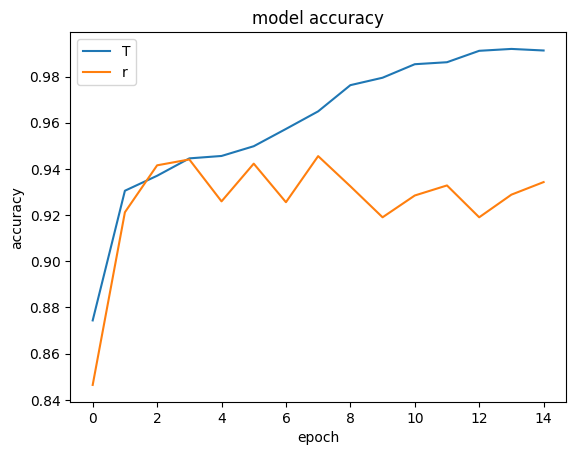

In [ ]:
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend('Train accuracy, Val accuracy')
plt.show()

**Evaluating Our Model**

In [ ]:
model.evaluate(test_dataset.take(1))[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.9375 - loss: 0.4483


0.4482918381690979

In [ ]:
def predict_image(x):
  if (x > 0.5):
    return 'Uninfected'
  else:
    return 'Infected'

In [ ]:
predict_image(model.evaluate(test_dataset.take(1))[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.9062 - loss: 0.4645


'Infected'

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


ValueError: num must be an integer with 1 <= num <= 9, not 10

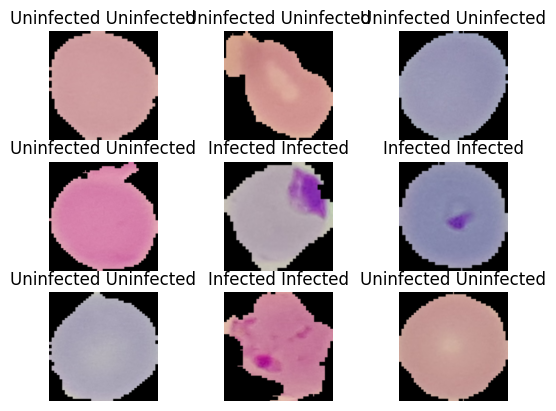

In [ ]:
for i, (images, labels) in enumerate(test_dataset.take(10)):
  for j in range(images.shape[0]):  # Iterate over each image in the batch
    ax = plt.subplot(3, 3, i * images.shape[0] + j + 1)
    plt.imshow(images[j])

    # Prediction for the current image
    prediction = model.predict(tf.expand_dims(images[j], axis=0))

    # Get the label for the current image
    label_value = labels[j].numpy() if hasattr(labels[j], 'numpy') else labels[j]

    plt.title(str(predict_image(label_value)) + " " + str(predict_image(prediction[0][0])))
    plt.axis('off')

plt.show()

**Model Saving and Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Save the model
model.save('/content/drive/MyDrive/model_relu.keras')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from tensorflow import keras

# Load the model
loaded_model = keras.models.load_model('/content/drive/MyDrive/model_relu.keras')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
loaded_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 6)         │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 222, 222, 6)         │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 111, 111, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 109, 109, 16)        │             880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 109, 109, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 54, 54, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 46656)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 100)                 │       4,665,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,004,365 (53.42 MB)

 Trainable params: 4,668,033 (17.81 MB)

 Non-trainable params: 264 (1.03 KB)

 Optimizer params: 9,336,068 (35.61 MB)

In [ ]:
predict_image(loaded_model.evaluate(test_dataset.take(1))[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.9375 - loss: 0.4137


'Infected'

***Functional Api***

In [ ]:
def find(x):
  if (x > 0.5):
    return 'U'
  else:
    return 'I'

In [ ]:
find(loaded_model.predict(test_dataset.take(1))[8])

1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step


'I'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


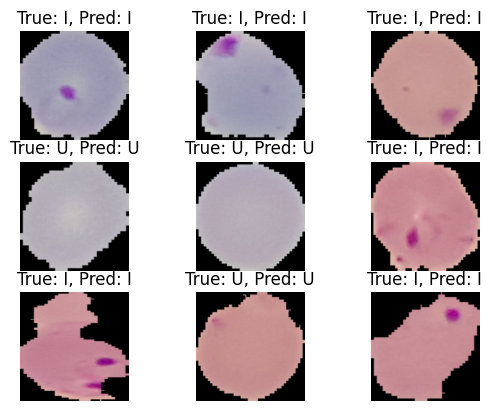

In [ ]:
import matplotlib.pyplot as plt

def find(x):
  if (x > 0.5):
    return 'U'
  else:
    return 'I'

# Assuming 'loaded_model' is your loaded SavedModel
# and 'test_dataset' is your test dataset

for i, (images, labels) in enumerate(test_dataset.take(1)):  # Take only 1 batch to get up to 9 images
    for j in range(min(9, images.shape[0])):  # Iterate through up to 9 images
        ax = plt.subplot(3, 3, j + 1)  # Create subplots in a 3x3 grid
        plt.imshow(images[j])

        # Get prediction for current image
        infer = loaded_model.signatures["serving_default"]
        prediction = infer(tf.constant(images[j][tf.newaxis, ...]))
        prediction_value = list(prediction.values())[0][0].numpy() # Extract prediction value


        # Display true and predicted label on the axis
        plt.title(f"True: {find(labels[j].numpy())}, Pred: {find(prediction_value)}")
        plt.axis('off')

plt.show()

In [ ]:
loaded_model

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x7d89e13c7d30>